In [932]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [933]:
df = pd.read_csv("dataset.csv")
df.head()

,song_id,keyword_1,keyword_2,keyword_3,genre
0,74,guitar,happy,distorted,rock
1,103,brass,energetic,melodic,classical
2,201,banjo,happy,acoustic,country
3,194,synth,energetic,heavy,hip-hop
4,184,synth,energetic,slow,hip-hop


In [981]:
ALL_GENRES = {}
for idx, row in df.iterrows():
    if row['genre'] not in ALL_GENRES:
        ALL_GENRES[row['genre']] = [idx]
    else:
        ALL_GENRES[row['genre']].append(idx)

ALL_GENRES

{'rock': [0,
  6,
  7,
  15,
  18,
  21,
  25,
  26,
  27,
  29,
  30,
  35,
  40,
  45,
  49,
  52,
  61,
  68,
  70,
  92,
  95,
  98,
  104,
  107,
  111,
  130,
  131,
  133,
  134,
  141],
 'classical': [1,
  5,
  8,
  11,
  13,
  16,
  32,
  33,
  34,
  44,
  50,
  51,
  69,
  72,
  73,
  78,
  94,
  100,
  102,
  105,
  109,
  116,
  117,
  119,
  122,
  124,
  125],
 'country': [2,
  9,
  12,
  14,
  20,
  31,
  37,
  43,
  46,
  48,
  54,
  55,
  59,
  60,
  63,
  67,
  77,
  80,
  82,
  90,
  99,
  114,
  118,
  121,
  123,
  128,
  129,
  139,
  140],
 'hip-hop': [3,
  4,
  19,
  22,
  23,
  28,
  42,
  53,
  56,
  57,
  62,
  64,
  66,
  74,
  75,
  79,
  81,
  84,
  91,
  93,
  101,
  112,
  115,
  126,
  127,
  132,
  135,
  137,
  138,
  142],
 'pop': [10,
  17,
  24,
  36,
  38,
  39,
  41,
  47,
  58,
  65,
  71,
  76,
  83,
  85,
  86,
  87,
  88,
  89,
  96,
  97,
  103,
  106,
  108,
  110,
  113,
  120,
  136,
  143,
  144,
  145,
  146]}

## Generating word embeddings for the keywords using BoW

In [934]:
KEYWORD_MAPPING = {}
ALL_KEYWORDS = {}
c = 0

for idx, row in df.iterrows():
    for i in range(1, 4):

        # for ALL_KEYWORDS
        if row[f'keyword_{i}'] not in ALL_KEYWORDS:
            ALL_KEYWORDS[row[f'keyword_{i}']] = c
            c += 1

        # for KEYWORD_MAPPPING
        if row[f'keyword_{i}'] in KEYWORD_MAPPING:
            
            for j in range(1, 4):
                if i != j:
                    if row[f'keyword_{j}'] in KEYWORD_MAPPING[row[f'keyword_{i}']] :
                        KEYWORD_MAPPING[row[f'keyword_{i}']][row[f'keyword_{j}']] += 1
                    else:
                        KEYWORD_MAPPING[row[f'keyword_{i}']][row[f'keyword_{j}']] = 0
                        
        else:
            KEYWORD_MAPPING[row[f'keyword_{i}']] = {}

MOST_OCCURED = 0
for i in KEYWORD_MAPPING:
    for j in KEYWORD_MAPPING[i]:
        if KEYWORD_MAPPING[i][j] > MOST_OCCURED:
            MOST_OCCURED = KEYWORD_MAPPING[i][j]

KEYWORD_MAPPING, ALL_KEYWORDS, MOST_OCCURED

({'guitar': {'energetic': 14,
   'melodic': 10,
   'happy': 11,
   'heavy': 4,
   'nostalgic': 2,
   'twangy': 3,
   'upbeat': 11,
   'mellow': 11,
   'emotional': 0,
   'rhythmic': 3,
   'sad': 10,
   'acoustic': 7,
   'fast': 10,
   'angry': 5,
   'distorted': 3,
   'slow': 5,
   'danceable': 1,
   'calm': 0},
  'happy': {'banjo': 0,
   'acoustic': 1,
   'guitar': 11,
   'heavy': 1,
   'brass': 2,
   'slow': 3,
   'upbeat': 4,
   'synth': 8,
   'fast': 4,
   'melodic': 4,
   'rhythmic': 3,
   'twangy': 0,
   'violin': 2,
   'danceable': 0,
   'piano': 0},
  'distorted': {'guitar': 3,
   'energetic': 0,
   'angry': 0,
   'mellow': 0,
   'sad': 0},
  'brass': {'calm': 1,
   'upbeat': 1,
   'happy': 2,
   'slow': 1,
   'mellow': 1,
   'fast': 3,
   'energetic': 1,
   'melodic': 1,
   'sad': 0},
  'energetic': {'synth': 6,
   'heavy': 1,
   'slow': 4,
   'guitar': 14,
   'melodic': 2,
   'twangy': 0,
   'upbeat': 2,
   'fast': 5,
   'acoustic': 1,
   'distorted': 0,
   'violin': 0,
   'b

In [935]:
def create_embeddings(keyword):

    ans = np.zeros(len(ALL_KEYWORDS))
    ans[ALL_KEYWORDS[keyword]] = MOST_OCCURED*2
    
    for key in KEYWORD_MAPPING:
        if key != keyword:
            if key in KEYWORD_MAPPING[keyword]:
                ans[ALL_KEYWORDS[key]] = KEYWORD_MAPPING[keyword][key]

    return ans

create_embeddings('slow')

array([ 5.,  3.,  0.,  1.,  3.,  0.,  0.,  0.,  5.,  0., 28.,  2.,  0.,
        2.,  2.,  3.,  2.,  0.,  0.,  0.,  0.,  0.,  2.,  0.])

In [936]:
def give_df_keyword_embeddings(df):
    arr = []
    for idx, row in df.iterrows():
        t = []
        t.append(create_embeddings(row['keyword_1']))
        t.append(create_embeddings(row['keyword_2']))
        t.append(create_embeddings(row['keyword_3']))
        arr.append(t)

    return np.array(arr)

In [937]:
embeddings = give_df_keyword_embeddings(df)
embeddings

array([[[28., 11.,  3., ...,  5., 10.,  1.],
        [11., 28.,  0., ...,  0.,  0.,  0.],
        [ 3.,  0., 28., ...,  0.,  0.,  0.]],

       [[ 0.,  2.,  0., ...,  0.,  0.,  0.],
        [14.,  0.,  0., ...,  0.,  0.,  0.],
        [10.,  4.,  0., ...,  1.,  4.,  0.]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [11., 28.,  0., ...,  0.,  0.,  0.],
        [ 7.,  0.,  0., ...,  0.,  1.,  0.]],

       ...,

       [[28., 11.,  3., ...,  5., 10.,  1.],
        [11., 28.,  0., ...,  0.,  0.,  0.],
        [ 3.,  3.,  0., ...,  0.,  0.,  0.]],

       [[ 0.,  8.,  0., ...,  5.,  5.,  2.],
        [11.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0., 28.]],

       [[ 0.,  8.,  0., ...,  5.,  5.,  2.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 5.,  3.,  0., ...,  0.,  2.,  0.]]])

## Dimensionality Reduction for each keyword matrix

In [938]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        cov = np.cov(X.T)
        
        eigenvectors, eigenvalues = np.linalg.eig(cov)

        eigenvectors = eigenvectors.T

        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

In [939]:
def transform_embeddings(embeddings, PCA):

    arr = []
    for i, row in enumerate(embeddings):
        pca = PCA(2)
        pca.fit(row)
        reduced_dim_row = pca.transform(row)
        arr.append(reduced_dim_row)
    
    return np.array(arr)

transformed_embeddings = transform_embeddings(embeddings, PCA)
transformed_embeddings

array([[[ 8.18970995e-13-1.11234913e-14j,
          1.63372017e+03-4.80302462e-14j],
        [-1.06069487e-13-4.45582355e-15j,
         -2.36003744e+02+4.92698860e-14j],
        [-7.12901507e-13+1.55793149e-14j,
         -1.39771642e+03-1.23963988e-15j]],

       [[-2.32123849e+01+2.54333230e-15j,
          7.79334059e+03-1.03390070e-14j],
        [ 7.17150460e+02-5.00382572e-15j,
         -4.08176100e+03-1.01319098e-14j],
        [-6.93938075e+02+2.46049341e-15j,
         -3.71157958e+03+2.04709168e-14j]],

       [[-5.28485552e+02+0.00000000e+00j,
         -4.38989723e+02+0.00000000e+00j],
        [ 1.05697110e+03+0.00000000e+00j,
          4.81615282e+02+0.00000000e+00j],
        [-5.28485552e+02+0.00000000e+00j,
         -4.26255589e+01+0.00000000e+00j]],

       [[ 1.09061869e+03-9.95592426e-14j,
          4.84719420e+02+4.87131296e-14j],
        [-7.27079130e+02+1.75109744e-13j,
         -2.42359710e+02-2.87517210e-14j],
        [-3.63539565e+02-7.55505018e-14j,
         -2.42359

## Combining the embeddings into one

In [940]:
def combine_embeddings(transformed_embeddings):
    arr = []

    for i, row in enumerate(transformed_embeddings):
        t = [0, 0]
        for j, vals in enumerate(row):
            t[0] += vals[0]
            t[1] += vals[1]
        t[0] /= len(row)
        t[0] = t[0].real
        t[1] /= len(row)
        t[1] = t[1].real
        
        arr.append(t)

    return np.array(arr)

combined_embeddings = combine_embeddings(transformed_embeddings)
combined_embeddings

array([[-6.73161306e-29, -7.57912251e-14],
       [ 3.78956126e-14, -1.51582450e-13],
       [ 7.57912251e-14,  5.68434189e-14],
       [ 1.89478063e-14,  2.84217094e-14],
       [-3.78956126e-14, -3.78956126e-14],
       [ 1.51582450e-13, -6.06329801e-13],
       [ 3.03164901e-13,  1.13686838e-13],
       [ 1.13686838e-13, -4.54747351e-13],
       [ 3.78956126e-14,  0.00000000e+00],
       [ 3.03164901e-13,  1.13686838e-13],
       [ 0.00000000e+00, -1.05181454e-30],
       [ 9.47390314e-15,  3.78956126e-14],
       [ 3.03164901e-13,  2.27373675e-13],
       [-3.78956126e-14,  7.57912251e-14],
       [-2.10362908e-29,  3.78956126e-14],
       [ 0.00000000e+00, -1.51582450e-13],
       [ 0.00000000e+00, -7.57912251e-13],
       [ 2.27373675e-13,  7.57912251e-14],
       [-2.10362908e-29,  3.78956126e-14],
       [ 1.51582450e-13, -7.57912251e-14],
       [ 0.00000000e+00,  0.00000000e+00],
       [-1.51582450e-13,  3.03164901e-13],
       [-1.89478063e-14,  3.03164901e-13],
       [-5.

## Apply K-Means clustering

In [941]:
def get_squared_dis(x1, y1, x2, y2):
    return (x1 - x2)**2 + (y1 - y2)**2

In [942]:
def compute_init_centroids(K, matrix):
    random_idx = np.random.permutation(matrix.shape[0])
    
    centroids = matrix[random_idx[:K]]
    
    return centroids
    

In [943]:
def get_cluster_index(centroids, matrix, K):
    m ,n = matrix.shape
    cluster_index = np.zeros(m)

    for i in range(m):

        d = get_squared_dis(matrix[i][0], matrix[i][1], centroids[0][0], centroids[0][1])
        ans = 0
        for j in range(1, K):
            new_d = get_squared_dis(matrix[i][0], matrix[i][1], centroids[j][0], centroids[j][1])
            if(new_d < d):
                d = new_d
                ans = j

        cluster_index[i] = ans

    return cluster_index
                
            

In [944]:
def compute_centroids(cluster_index, matrix, centroids, k):
    m, n = matrix.shape
    new_centroids = []

    for i in range(k):

        x_m, y_m = 0, 0
        n = 0
        for j in range(m):
            if cluster_index[j] == i:
                x_m += matrix[j][0]
                y_m += matrix[j][1]
                n += 1

        if n != 0:
            x_m /= n
            y_m /= n

        new_centroids.append([x_m ,y_m])

    return np.array(new_centroids)

In [945]:
def run_KMeans(matrix, K, iterations):
    m, n = matrix.shape
    centroids = compute_init_centroids(K, matrix)

    for i in range(iterations):

        cluster_index = get_cluster_index(centroids, matrix, K)

        centroids = compute_centroids(cluster_index, matrix, centroids, K)

    return cluster_index, centroids

In [946]:
def cal_shilloute_dis(cluster_index, centroids, matrix, K):
    m, n = matrix.shape

    si_scores = np.zeros(K)

    for i in range(m):

        point = matrix[i]

        # calculating cohesion <intra cluster distance>
        arr = []
        for j in range(m):
            if cluster_index[j] == cluster_index[i] and i != j:
                arr.append(matrix[j])

        if len(arr) > 1:
            a_i = np.mean([get_squared_dis(point[0], point[1], other[0], other[1]) for other in arr if not np.array_equal(point, other)])
        else:
            a_i = 0


        # calculating separation <mean distance from nearest cluster>
        b_i = np.inf

        for j in range(K):
            if j == cluster_index[i]:
                continue

            arr = []
            for k in range(m):
                if cluster_index[k] == j:
                    arr.append(matrix[k])

            b_i = min(b_i, np.mean([get_squared_dis(point[0], point[1], other[0], other[1]) for other in arr]))

        # computer score
        if max(a_i, b_i) > 0 :
            si_scores =  (b_i - a_i) / max(a_i, b_i)


    return np.mean(si_scores)
        

In [947]:
def apply_clustering(matrix):
    best, K = -1, 1
    best_cluster_index, best_centroids = None, None
    
    for i in range(2, 10):
        cluster_index, centroids = run_KMeans(matrix, i, 20)
        score = cal_shilloute_dis(cluster_index, centroids, matrix, i)
        
        if score > best:
            best = score
            K = i
            best_cluster_index = cluster_index
            best_centroids = centroids
    
    return best, K, best_cluster_index, best_centroids

In [948]:
best, K, cluster_index, centroids = apply_clustering(combined_embeddings)
best, K, cluster_index, centroids

(np.float64(0.9435101931162149),
 5,
 array([4., 4., 4., 4., 4., 3., 2., 3., 4., 2., 4., 4., 2., 4., 4., 4., 3.,
        2., 4., 4., 4., 1., 1., 1., 0., 1., 4., 4., 4., 4., 4., 4., 4., 4.,
        3., 4., 3., 4., 4., 4., 4., 4., 0., 3., 4., 4., 2., 4., 1., 4., 1.,
        2., 4., 4., 4., 1., 4., 4., 4., 4., 1., 0., 3., 4., 4., 1., 4., 1.,
        0., 4., 1., 4., 1., 2., 3., 0., 4., 1., 4., 4., 0., 1., 4., 2., 4.,
        4., 4., 2., 2., 1., 4., 4., 4., 4., 4., 1., 4., 4., 4., 4., 2., 4.,
        0., 4., 4., 4., 2., 4., 4., 3., 4., 1., 4., 4., 0., 1., 4., 3., 1.,
        4., 4., 4., 1., 4., 4., 4., 4., 1., 4., 2., 1., 0., 0., 4., 0., 4.,
        3., 3., 1., 4., 3., 4., 0., 4., 0., 2., 4.]),
 array([[-2.85674618e-13, -4.51832304e-14],
        [-1.83098772e-14,  2.69388376e-13],
        [ 3.66098686e-13,  1.18423789e-14],
        [ 3.78956126e-14, -5.01388105e-13],
        [-7.04903508e-16, -1.95963175e-14]]))

## Graph for clustering

In [961]:
COLOR_MAP = {}
for i in range(K):
    COLOR_MAP[i] = (random.random(), random.random(), random.random())
def get_color_for_plot(i, K):
    return COLOR_MAP[i]

In [962]:
def make_graph(K, cluster_index, centroids, matrix):

    m, n = matrix.shape

    # plotting data points
    for i in range(m):
        color = get_color_for_plot(cluster_index[i], K)
        plt.scatter(matrix[i][0], matrix[i][1], marker = "o", color = color, s=50, edgecolors="black")

    # plotting centroids
    for i in range(K):
        color = get_color_for_plot(i, K)
        plt.scatter(centroids[i][0], centroids[i][1], marker = "x", color = "black")

    plt.title("Scatter Plot Based on the algorithms applied")

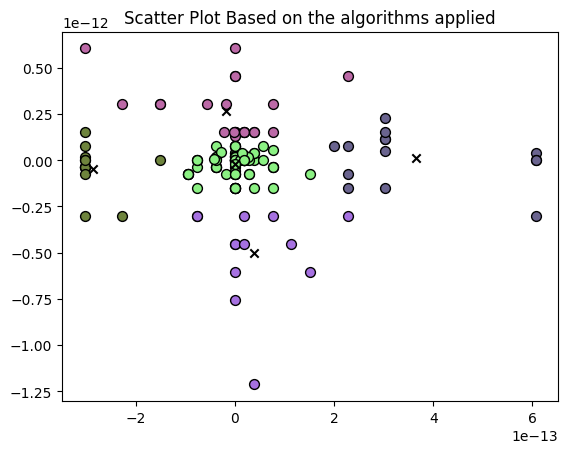

In [963]:
make_graph(K, cluster_index, centroids, combined_embeddings)

In [984]:
def give_intersection(l1, l2):
    ans = 0
    for i in l1:
        if i in l2:
            ans += 1

    return ans

In [992]:
def get_genre_by_cluster(cluster_index, all_genres, matrix, K):
    mapping = []

    for i in range(K):
        ans = "Not Known"
        n = 0
        
        l = []
        for j in range(len(cluster_index)):
            if cluster_index[j] == i:
                l.append(j)

        for key in ALL_GENRES:
            intersection = give_intersection(ALL_GENRES[key], l)
            if intersection > n:
                n = intersection
                ans = key

        mapping.append(ans)

    return mapping

GENRE_BY_CLUSTER = get_genre_by_cluster(cluster_index, ALL_GENRES, combined_embeddings, K)

In [993]:
def predict(keyword_1, keyword_2, keyword_3, centroids):
    arr = []
    arr.append(create_embeddings(keyword_1))
    arr.append(create_embeddings(keyword_2))
    arr.append(create_embeddings(keyword_3))
    
    pca = PCA(2)
    pca.fit(arr)
    arr = pca.transform(arr)

    combined_arr = [0, 0]
    for i in arr:
        combined_arr[0] += i[0]
        combined_arr[1] += i[1]
    combined_arr[0] /= len(arr)
    combined_arr[0] = combined_arr[0].real
    combined_arr[1] /= len(arr)
    combined_arr[1] = combined_arr[1].real

    d_min = np.inf
    centroid_idx = -1
    for i in range(len(centroids)):
        d = get_squared_dis(centroids[i][0], centroids[i][1], combined_arr[0], combined_arr[1])
        if d < d_min:
            d_min = d
            centroid_idx = i

    return GENRE_BY_CLUSTER[centroid_idx]

In [996]:
predict("guitar", "distorted", "distorted", centroids)

'pop'